## 2 Remove Outliers in Datasets 2
## """Build plots to explore for outliers: (from data directory)"""
#### Dataset2: Plantas infectadas de Arabidopsis
#### Cynthia Soto
#### Fecha: 1 de Octubre 2020
#### Type of data: expression levels (absolute and TPM)
#### Data estimated with: STAR/HTSeq

Outliers can be removed from the data using statistical methods of IQR, Z-Score and Data Smoothing
1. For calculating IQR of a dataset first calculate it’s 1st Quartile(Q1) and 3rd Quartile(Q3) i.e. 25th and 75 percentile of the data and then subtract Q1 from Q3.
2. Z-Score tells how far a point is from the mean of dataset in terms of standard deviation.An absolute value of z score which is above 3 is termed as an outlier.
3. Data smoothing is a process to remove the spikes and peaks from the data. Moving Average, Rolling Mean and Exponential smoothing are some of the process to smooth the data. Pandas Exponential smoothing function (EWM) can be used to calculate the value at different alpha level.



In [1]:
# Libraries required
import os 
import glob
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib widget

import numpy as np
# importing Statistics module 
import statistics 
from scipy.stats import iqr
from scipy import stats

In [2]:
try:
    # Change the current working Directory    
    os.chdir("/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal2_htseq-counts/")
    print("Directory changed:", os.getcwd() )
except OSError:
    print("Can't change the Current Working Directory")    

s_path = str(os.getcwd())+'/*_Log2.csv'
print("Path to retrieve data:", s_path)
print(os.listdir(os.getcwd()))    

Directory changed: /home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal2_htseq-counts
Path to retrieve data: /home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal2_htseq-counts/*_Log2.csv
['SRR6283147', 'Readme.md', 'SRR364399_Log2.csv', 'SRR3383696', 'my_statistics_HTSeq_counts.txt', 'SRR364398', 'SRR10586397pe', 'all_log2_counter_cero.csv', 'SRR364389', 'SRR364390', 'SRR6283148_Log2.csv', 'SRR6283147_Log2.csv', 'SRR3383696_Log2.csv', 'SRR3383780_Log2.csv', 'all_log2_12_ceros.csv', 'SRR10586399pe', 'SRR3383697', 'SRR10586397pe_Log2.csv', 'SRR10586399pe_Log2.csv', 'SRR3383779_Log2.csv', 'all_genesIDs_cero', 'SRR3383697_Log2.csv', 'SRR364390_Log2.csv', 'SRR3383779', 'all_samples_log2.csv', 'SRR364399', '.Rhistory', 'SRR364389_Log2.csv', 'SRR3383780', 'my_statistics_HTSeq.sh', 'SRR6283148', 'SRR364398_Log2.csv']


## Plotting some important distributions: Scatteredplot


/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal2_htseq-counts/SRR364399_Log2.csv


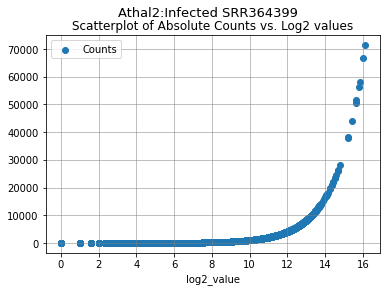

/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal2_htseq-counts/SRR6283148_Log2.csv


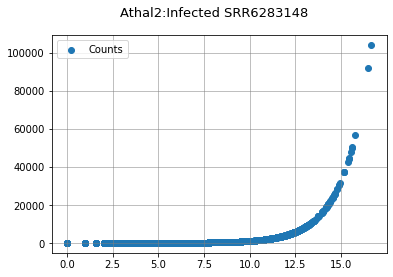

/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal2_htseq-counts/SRR6283147_Log2.csv


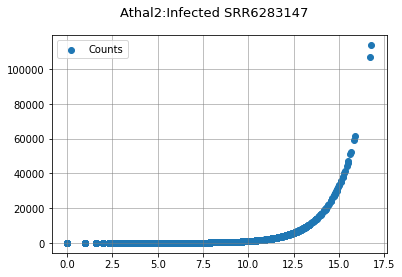

/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal2_htseq-counts/SRR3383696_Log2.csv


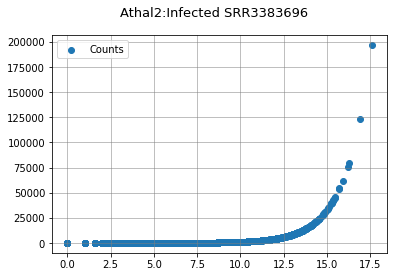

/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal2_htseq-counts/SRR3383780_Log2.csv


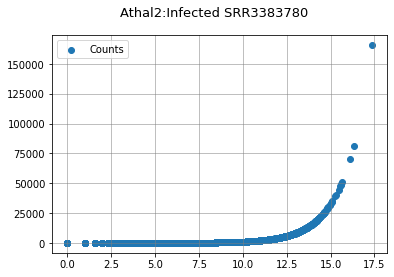

/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal2_htseq-counts/SRR10586397pe_Log2.csv


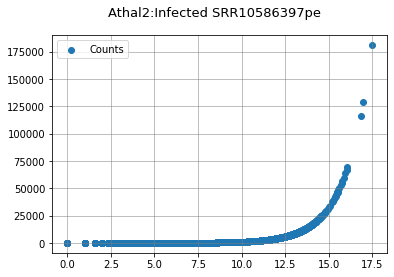

/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal2_htseq-counts/SRR10586399pe_Log2.csv


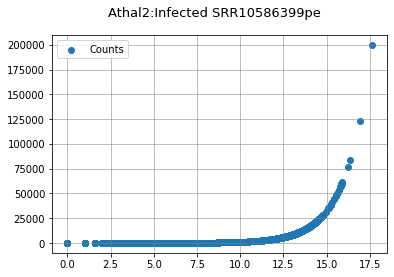

/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal2_htseq-counts/SRR3383779_Log2.csv


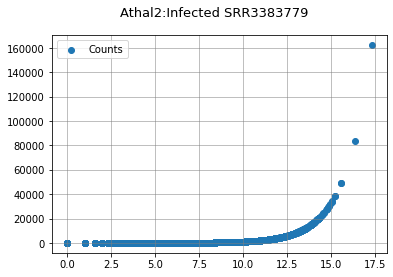

/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal2_htseq-counts/SRR3383697_Log2.csv


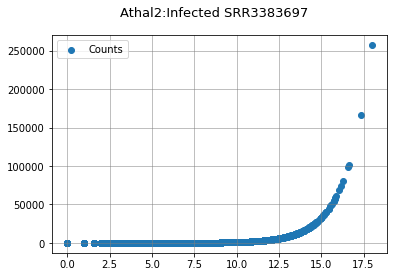

/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal2_htseq-counts/SRR364390_Log2.csv


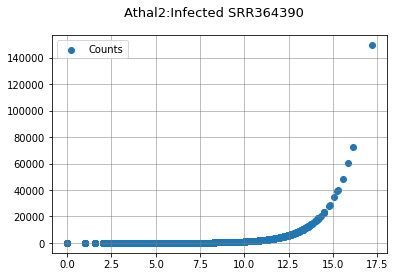

/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal2_htseq-counts/SRR364389_Log2.csv


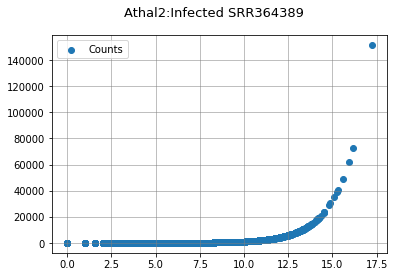

/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal2_htseq-counts/SRR364398_Log2.csv


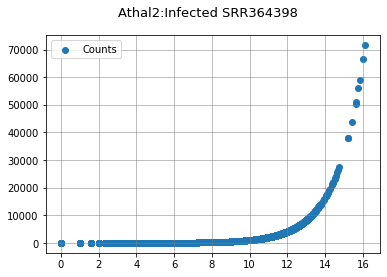

In [3]:
## CREATE INDIVIDUAL PLOTS

all_files = glob.glob(s_path)

plt.title('Scatterplot of Absolute Counts vs. Log2 values')
plt.xlabel('log2_value')
## plt_ind.ylabel('Counts')

for file in all_files:
    print(file)
    df= pd.read_csv(file, sep='\t')
    #print(df.head(3))
    
    ## GET FILE NAME TO STORE STATISTICS
    f_name = file.split("_")
    x= f_name[1]
    f_name1=x.split("/")
    x1= f_name1[1]

    ## INDIVIDUAL scattered plots (log2 values)
    plt.grid(color='grey', linestyle='-', linewidth=0.5)
    plt.scatter('log2_value','Counts', data=df)
    plt.suptitle('Athal2:Infected '+x1, fontsize=13)
    plt.legend()
    plt.show()
    #plt.savefig("../athal1_stats/"+x1+"_scattered_abs_log2.png")     

## Retrieve meta-data for label leyends with more sense
file='athal2_metadata.csv'


In [53]:
print(str(os.getcwd()))
lst_header=["sample","fungus","hpi","ID_sample","good"] 
file='~/Proyectos/athal2_stats/metadata.csv'
df_meta=pd.read_csv(file, sep='\,', engine='python', usecols=[0,4]) 
print(df_meta.index)
print(df_meta)
## filter the ID sample
is_sample =  df_meta['sample']=='SRR364399'
sample = df_meta[is_sample]
ID_sample = sample['ID'].values[0]
ID_sample


/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal2_htseq-counts
RangeIndex(start=0, stop=12, step=1)
           sample    ID
0      SRR3383696  Bc12
1      SRR3383697  Bc12
2      SRR3383779  Bc18
3      SRR3383780  Bc18
4   SRR10586397pe  Bc24
5   SRR10586399pe  Bc24
6       SRR364389  Ch22
7       SRR364390  Ch22
8       SRR364398  Ch40
9       SRR364399  Ch40
10     SRR6283147  Ss30
11     SRR6283148  Ss30


'Ch40'

['Ch40 hpi']
['Ch40 hpi', 'Ss30 hpi']
['Ch40 hpi', 'Ss30 hpi', 'Ss30 hpi']
['Ch40 hpi', 'Ss30 hpi', 'Ss30 hpi', 'Bc12 hpi']
['Ch40 hpi', 'Ss30 hpi', 'Ss30 hpi', 'Bc12 hpi', 'Bc18 hpi']
['Ch40 hpi', 'Ss30 hpi', 'Ss30 hpi', 'Bc12 hpi', 'Bc18 hpi', 'Bc24 hpi']
['Ch40 hpi', 'Ss30 hpi', 'Ss30 hpi', 'Bc12 hpi', 'Bc18 hpi', 'Bc24 hpi', 'Bc24 hpi']
['Ch40 hpi', 'Ss30 hpi', 'Ss30 hpi', 'Bc12 hpi', 'Bc18 hpi', 'Bc24 hpi', 'Bc24 hpi', 'Bc18 hpi']
['Ch40 hpi', 'Ss30 hpi', 'Ss30 hpi', 'Bc12 hpi', 'Bc18 hpi', 'Bc24 hpi', 'Bc24 hpi', 'Bc18 hpi', 'Bc12 hpi']
['Ch40 hpi', 'Ss30 hpi', 'Ss30 hpi', 'Bc12 hpi', 'Bc18 hpi', 'Bc24 hpi', 'Bc24 hpi', 'Bc18 hpi', 'Bc12 hpi', 'Ch22 hpi']
['Ch40 hpi', 'Ss30 hpi', 'Ss30 hpi', 'Bc12 hpi', 'Bc18 hpi', 'Bc24 hpi', 'Bc24 hpi', 'Bc18 hpi', 'Bc12 hpi', 'Ch22 hpi', 'Ch22 hpi']
['Ch40 hpi', 'Ss30 hpi', 'Ss30 hpi', 'Bc12 hpi', 'Bc18 hpi', 'Bc24 hpi', 'Bc24 hpi', 'Bc18 hpi', 'Bc12 hpi', 'Ch22 hpi', 'Ch22 hpi', 'Ch40 hpi']


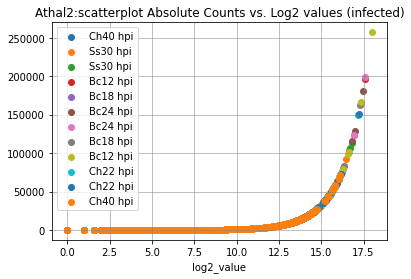

In [52]:
## CREATE A unique PLOT OF SCATTERED-PLOTS
all_files = glob.glob(s_path)
lst_samples = []
plt.title('Athal2:scatterplot Absolute Counts vs. Log2 values (infected)')
plt.xlabel('log2_value')
plt.grid(color='grey', linestyle='-', linewidth=0.5)
## plt_ind.ylabel('Counts')
    
## Merged scattered plots (log2 values)
for file in all_files:
    #print(file)
    
    ## GET FILE NAME TO STORE STATISTICS
    f_name = file.split("_")
    x= f_name[1]
    f_name1=x.split("/")
    x1= f_name1[1]    
    ## GET THE ID SAMPLE NAME
    is_sample =  df_meta['sample']==x1
    sample = df_meta[is_sample]
    ID_sample = sample['ID'].values[0]
    #print(ID_sample)
   
    ## Declare a list with leyends
    lst_samples.append(ID_sample+' hpi')  
    print(lst_samples)
    
    df= pd.read_csv(file, sep='\t') 
    ## Individual scattered plots (log2 values)
    plt.scatter('log2_value','Counts', data=df)     # label=x1 (x1 have the acccion ID)
    plt.legend(lst_samples)
    ## add arbitrary lines to canvas
    #plt.plot([17.5, 19], [300000, 300000], 'k-', lw=2, marker = 'o')
    #plt.savefig("../athal1_stats/all_scattered_abs_log2.png")
    #plt.show()    


We'll now use the amazing Seaborn module to do some EDA. I strongly encourage you to look at their gallery to see some awesome examples. This module is great to make some interesting and publishable graphs for your future papers.

We'll explore our data set using different color palettes.


Violin plots make a kernel density estimation(KDE) of the distribution. If you want a deeper intuition about what a KDE means please refer to the great Jake Van der Plas' Data Science Handbook. KDE plots are a nice way to visualize continuous distributions. The Seaborn library has some nice implementations in both the sns.distplot and sns.kdeplot functions. Here is a nice walkthrough of the different options to visualize distributions in Seaborn.

To get a better sense of the data when using violin plots, I personally prefer to set the inner parameter to quartile, as it shows the locations of the quartiles (25th, 75th percentile and the median) in the data, and gives a sense of how the data is distributed. Moreover, I like that all of the violins have the same width, so they are readily comparable to each other, thus I set the scale parameter to width


Violinplots are nice, but to get a real sense of the raw data, is best to use a stripplot or swarmplot to visualize the individual points in a dataset. As a general rule of thumb, always plot all your data points

## Normal distribution for Log2 values

/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal2_htseq-counts/SRR364399_Log2.csv
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal2_htseq-counts/SRR6283148_Log2.csv
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal2_htseq-counts/SRR6283147_Log2.csv
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal2_htseq-counts/SRR3383696_Log2.csv
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal2_htseq-counts/SRR3383780_Log2.csv
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal2_htseq-counts/SRR10586397pe_Log2.csv
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal2_htseq-counts/SRR10586399pe_Log2.csv
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal2_htseq-counts/SRR3383779_Log2.csv
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal2_htseq-counts/SRR3383697_Log2.csv
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal2_htseq-counts/SRR364390_Log2.csv
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-

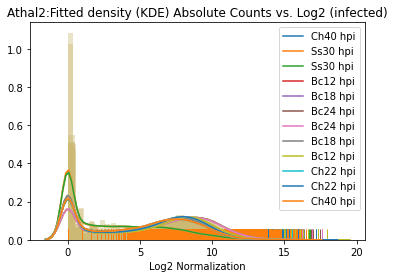

In [54]:
# Normal Distribution plot for Log2 values 
# norm_histbool, optional
# If True, the histogram height shows a density rather than a count. 
# This is implied if a KDE or fitted density is plotted
import seaborn as sns

all_files = glob.glob(s_path)
##set color codes
sns.set_color_codes()

for file in all_files:
    print(file)
    df1= pd.read_csv(file, sep='\t')
    #print(df1.head(5))
    ## GET FILE NAME TO STORE STATISTICS
    f_name = file.split("_")
    x= f_name[1]
    f_name1=x.split("/")
    x1= f_name1[1]
    
    ## GET THE ID SAMPLE NAME
    is_sample =  df_meta['sample']==x1
    sample = df_meta[is_sample]
    ID_sample = sample['ID'].values[0]
    #print(ID_sample)
    
    #Send log2 values to a vector (list) to plot a normal distribution 
    col_log2_list = df1['log2_value'].tolist()
    #print(col_log2_list)
    ## Get relevant information from panda series
    col_log2_list = pd.Series(col_log2_list, name="Log2 Normalization")
    
    sns.distplot(col_log2_list, color="y")
    #sns.distplot(col_log2_list, rug=True, hist=False, kde_kws={"label": x1});
    sns.distplot(col_log2_list, rug=True, hist=False, kde_kws={"label": ID_sample+' hpi'});
    ## rug=True, hist=False: Plot the distribution with a kernel density estimate and rug plot
    plt.title('Athal2:Fitted density (KDE) Absolute Counts vs. Log2 (infected)')
    #plt.savefig("../athal1_stats/"+x1+"_Fitted density.png")
    
    #Note seaborn has not savefig function
#plt.savefig("../athal1_stats/all_fitted density.png")

**Data for document tesis are until here** <br>
But, here are some others:  <br>
Below code to plot a KDE for particular serie

0        6.942515
1        6.954196
2        3.459432
3        9.303781
4        8.016808
           ...   
27650    3.459432
27651    8.661778
27652    7.700440
27653    2.000000
27654    4.754888
Name: Log2 Normalization, Length: 27655, dtype: float64


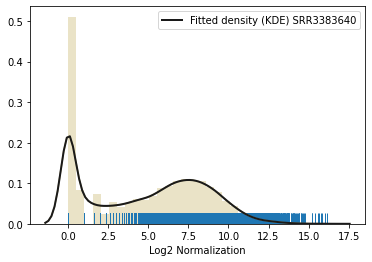

In [55]:
## Get relevant information from panda series
print(col_log2_list)
col_log2_list = pd.Series(col_log2_list, name="Log2 Normalization")

sns.distplot(col_log2_list, color="y")
sns.distplot(col_log2_list, rug=True, hist=False, kde_kws={"color": "k", "lw": 2, "label": "Fitted density (KDE) SRR3383640"});
# rug=True, hist=False: Plot the distribution with a kernel density estimate and rug plot

#plt.savefig("../athal1_stats/SRR3383640_Fitted density.png")
##Note seaborn has not savefig function

<AxesSubplot:xlabel='Log2 Normalization'>

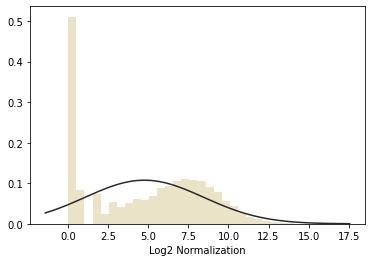

In [56]:
## Plot the distribution with a histogram and maximum likelihood Gaussian distribution fit:
from scipy.stats import norm
sns.distplot(col_log2_list, fit=norm, kde=False, color="y")

In [57]:
df.dtypes


Unnamed: 0      int64
Genes          object
Counts          int64
log2_value    float64
dtype: object

In descriptive statistics, a boxplot (also known as a box-and-whisker diagram or plot) is a convenient way of graphically depicting groups of numerical data through their five-number summaries (the smallest observation, lower quartile (Q1), median (Q2), upper quartile (Q3), and largest observation). A boxplot may also indicate which observations, if any, might be considered outliers. The boxplot was invented in 1977 by the American statistician John Tukey.

Text(0.5, 1.0, 'Box-and-whisker plot: absolute-counts')

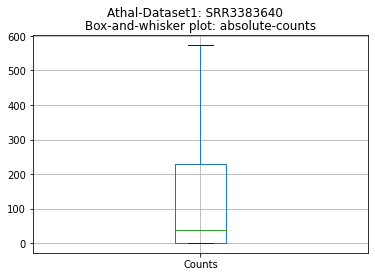

In [58]:
# Box-Whisher Plot with means 

ax = df.boxplot(column=['Counts'],showfliers=False)   ###, showmeans=True
# get rid of the automatic title
plt.suptitle("Athal-Dataset1: SRR3383640")
ax.set_xlabel("")
ax.set_title("Box-and-whisker plot: absolute-counts")


Text(0.5, 1.0, 'Boxplot of Log2 values')

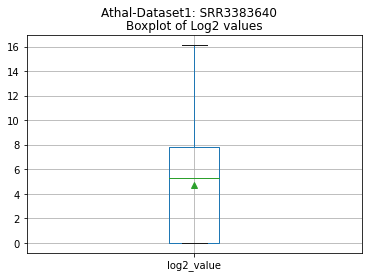

In [59]:
# Box-Whisher Plot with means 

ax = df.boxplot(column=['log2_value'],showfliers=False, showmeans=True)
# get rid of the automatic title
plt.suptitle("Athal-Dataset1: SRR3383640")
ax.set_xlabel("")
ax.set_title("Boxplot of Log2 values")

## Method 1: IQR
For calculating IQR of a dataset first calculate it’s 1st Quartile(Q1) and 3rd Quartile(Q3) i.e. 25th and 75 percentile of the data and then subtract Q1 from Q3.

### Cleaning data

Data preparation process can involve three steps: data selection, data preprocessing and data transformation.
Expected types values
    TPM:float
    NumReads: float
No missing data

I use two robust methods to remove outliers from the data and Data Smoothing techniques using Exponential Weighted Moving Average

a) IQR - Interquartile Range
b) Z-Score method for Outlier Removal

### Data Smoothing:

IQR is part of Descriptive statistics and also called as midspead, middle 50%
IQR is first Quartile minus the Third Quartile (Q3-Q1)

In [50]:
# Get the interquartile grade (IQR = Q3 - Q1)
iqr(lst_TPM, axis=0) 

98.010189

In [61]:
Q1 = np.quantile(lst_TPM,0.25)
Q3 = np.quantile(lst_TPM,0.75)
IQR = Q3 - Q1
print ("First quantile in TPM column:"+str(Q1))
print ("First third in TPM column:"+str(Q3))
print ("IQR in TPM column:"+str(IQR))
q10 = np.quantile(lst_TPM,0.10)
q90 = np.quantile(lst_TPM,0.90)
print ("10th.quantile in TPM column:"+str(q10))
print ("90th.quantile in TPM column:"+str(q90))

First quantile in TPM column:54.056874
First third in TPM column:152.067063
IQR in TPM column:98.010189
10th.quantile in TPM column:41.590169
90th.quantile in TPM column:312.417606


## Method 2: Z Score
Z score is an important measurement or score that tells how many Standard deviation above or below a number is from the mean of the dataset

Any positive Z score means the no. of standard deviation above the mean and a negative score means no. of standard deviation below the mean

In [69]:
df['z_score']=stats.zscore(df['TPM'])
df

,Name,Length,EffectiveLength,TPM,NumReads,z_score
0,TRINITY_DN688_c0_g1_i1,351,102.003,78.489229,28.0,-0.123207
1,TRINITY_DN600_c0_g1_i1,326,77.092,74.179055,20.0,-0.125477
2,TRINITY_DN685_c0_g1_i1,441,192.000,56.590790,38.0,-0.134741
3,TRINITY_DN655_c0_g1_i1,1116,867.000,27.702795,84.0,-0.149957
4,TRINITY_DN640_c0_g1_i1,652,403.000,50.375190,71.0,-0.138015
...,...,...,...,...,...,...
3196,TRINITY_DN2350_c0_g1_i1,573,324.000,36.182806,41.0,-0.145491
3197,TRINITY_DN2360_c0_g1_i1,277,34.302,133.371784,16.0,-0.094299
3198,TRINITY_DN2309_c0_g1_i1,498,249.000,51.674533,45.0,-0.137331
3199,TRINITY_DN2366_c0_g1_i1,307,58.716,642.807957,132.0,0.174031


### Empirical rule any absolute value of z-score above 3 is considered as an Outlier. This is quite debatable and may not hold true for every dataset in this world.
That is also in-line with the six sigma and statistical process control limits as well. So we have discarded any values which is above 3 values of Standard deviation to remove outliers

In [71]:
#Get max value of the numeric cols
df.select_dtypes(include=[np.number]).max()
df.select_dtypes(include=[np.number]).min()
#Get basic statics
df.describe()

,Length,EffectiveLength,TPM,NumReads,z_score
count,3201.000000,3201.000000,3201.000000,3201.000000,3.201000e+03
mean,500.084349,253.335170,312.402374,155.402999,1.775802e-17
std,307.164462,305.474797,1898.835931,482.621994,1.000156e+00
min,251.000000,21.005000,0.000000,0.000000,-1.645488e-01
25%,302.000000,54.120000,54.056874,20.000000,-1.360759e-01
50%,388.000000,139.000000,86.728262,37.000000,-1.188672e-01
75%,576.000000,327.000000,152.067063,95.000000,-8.445193e-02
max,3169.000000,2920.000000,48773.745983,8725.527000,2.552559e+01


In [82]:
df_filtered= df.loc[df['z_score'].abs()<=3]
df_filtered.shape


(3180, 6)

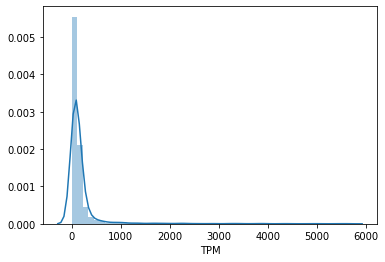

In [83]:
lst_TPM2 = df2 = df_filtered['TPM']
sns.distplot(lst_TPM2);

In [84]:
df_filtered

,Name,Length,EffectiveLength,TPM,NumReads,z_score
0,TRINITY_DN688_c0_g1_i1,351,102.003,78.489229,28.0,-0.123207
1,TRINITY_DN600_c0_g1_i1,326,77.092,74.179055,20.0,-0.125477
2,TRINITY_DN685_c0_g1_i1,441,192.000,56.590790,38.0,-0.134741
3,TRINITY_DN655_c0_g1_i1,1116,867.000,27.702795,84.0,-0.149957
4,TRINITY_DN640_c0_g1_i1,652,403.000,50.375190,71.0,-0.138015
...,...,...,...,...,...,...
3196,TRINITY_DN2350_c0_g1_i1,573,324.000,36.182806,41.0,-0.145491
3197,TRINITY_DN2360_c0_g1_i1,277,34.302,133.371784,16.0,-0.094299
3198,TRINITY_DN2309_c0_g1_i1,498,249.000,51.674533,45.0,-0.137331
3199,TRINITY_DN2366_c0_g1_i1,307,58.716,642.807957,132.0,0.174031


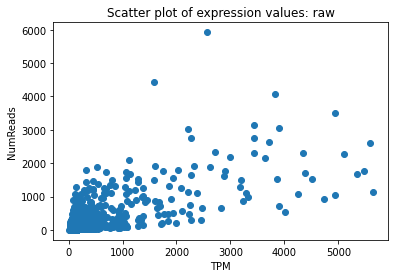

In [95]:
# Scatted plot absolute counts versus normalized count
plt.scatter('TPM','NumReads', data=df_filtered)
plt.xlabel('TPM')
plt.ylabel('NumReads')
plt.title('Scatter plot of expression values: raw')
plt.show()

In [88]:
Q1 = np.quantile(lst_TPM2,0.25)
Q3 = np.quantile(lst_TPM2,0.75)
IQR = Q3 - Q1
print ("First quantile in TPM column:"+str(Q1))
print ("First third in TPM column:"+str(Q3))
print ("IQR in TPM column:"+str(IQR))
q10 = np.quantile(lst_TPM2,0.10)
q90 = np.quantile(lst_TPM2,0.90)
print ("10th.quantile in TPM column:"+str(q10))
print ("90th.quantile in TPM column:"+str(q90))

First quantile in TPM column:53.929691000000005
First third in TPM column:150.01085899999998
IQR in TPM column:96.08116799999998
10th.quantile in TPM column:41.5571579
90th.quantile in TPM column:296.61221639999997


In [89]:
#Get max value of the numeric cols
df_filtered.select_dtypes(include=[np.number]).max()
df_filtered.select_dtypes(include=[np.number]).min()
#Get basic statics
df_filtered.describe()

,Length,EffectiveLength,TPM,NumReads,z_score
count,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000
mean,501.270126,254.510504,194.892500,131.053613,-0.061895
std,307.800724,306.113662,467.603745,323.281334,0.246297
min,251.000000,21.005000,0.000000,0.000000,-0.164549
25%,303.000000,55.027000,53.929691,20.000000,-0.136143
50%,388.500000,139.500000,86.338651,36.000000,-0.119072
75%,577.000000,328.000000,150.010859,92.250000,-0.085535
max,3169.000000,2920.000000,5638.732013,5923.000000,2.805488


## Method 3: Data Smoothing with Exponential smoothing(EWMA)

Smoothing of data is done for a variety of reasons and one of them is eliminating the spikes and outliers. If there is some outliers which are really high or a absolute low then smoothing helps to summarize the data and remove the noise from the data.

Use various techniques like rolling mean, moving averages and Exponential smoothing(EWMA)

The Exponential Smoothing(EWMA) unlike moving average which doesn’t treat all the data points equally while smoothing. Most of the time in a Time series data we want to treat the most recent data with more weight than the previous data.

For example: if your current value if 12 and previous value is 8 and smoothing level is 0.6 then the smoothed value is given by 12*0.6 + (1-0.6)*8

### Finding Exponential Smoothing values using Pandas

In [100]:
df.shape

(3201, 6)

In [101]:
df['ewm_alpha_1']=df['TPM'].ewm(alpha=0.1).mean()
df['ewm_alpha_3']=df['TPM'].ewm(alpha=0.3).mean()
df['ewm_alpha_6']=df['TPM'].ewm(alpha=0.6).mean()
df

,Name,Length,EffectiveLength,TPM,NumReads,z_score,ewm_alpha_1,ewm_alpha_3,ewm_alpha_6
0,TRINITY_DN688_c0_g1_i1,351,102.003,78.489229,28.0,-0.123207,78.489229,78.489229,78.489229
1,TRINITY_DN600_c0_g1_i1,326,77.092,74.179055,20.0,-0.125477,76.220716,75.953833,75.410533
2,TRINITY_DN685_c0_g1_i1,441,192.000,56.590790,38.0,-0.134741,68.977201,67.112261,63.346595
3,TRINITY_DN655_c0_g1_i1,1116,867.000,27.702795,84.0,-0.149957,56.975338,51.553845,41.398442
4,TRINITY_DN640_c0_g1_i1,652,403.000,50.375190,71.0,-0.138015,55.363620,51.128814,46.840215
...,...,...,...,...,...,...,...,...,...
3196,TRINITY_DN2350_c0_g1_i1,573,324.000,36.182806,41.0,-0.145491,176.168418,122.386010,103.026309
3197,TRINITY_DN2360_c0_g1_i1,277,34.302,133.371784,16.0,-0.094299,171.888755,125.681742,121.233594
3198,TRINITY_DN2309_c0_g1_i1,498,249.000,51.674533,45.0,-0.137331,159.867333,103.479579,79.498157
3199,TRINITY_DN2366_c0_g1_i1,307,58.716,642.807957,132.0,0.174031,208.161395,265.278093,417.484037
